<h1> Predicting factors that increase the risk of Heart Disease diagnosis </h1>

<h2> Introduction </h2>

<h4>Background Information/Why Heart Disease?</h4>

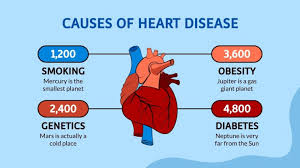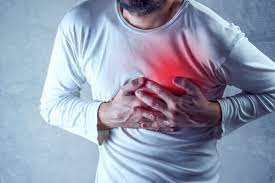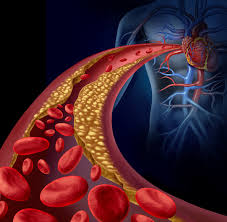

According to CDC's studies, one person dies every 34 seconds in the United states due to heart disease. Due to the fatty diets of regular North American citizens, cases of heart disease diagnosis has drastically increased in the past decade. Heart disease is caused from the blockage of our blood flow due to fat or other harmful buildups, decreasing the oxygen inflow. This has made many people in North America suffer from  devastating consequences such as shortness of breath or even heart attacks and thus, we recognize that there is a need to predict factors that worsens the heart disease for future mitigations. 

**Our Predictive Question:** Can we predict the risk of being diagnosed with heart disease based on the patients' health attributes and how will we find the predictors that are the most optimal? 

In this project, we start from reading and tidying the data then visualize and classify the unknown categorical variable to answer a predictive question of our choice. Our group chose this question because being able to predict the level of heart disease based on health factors like heart rate or cholestrol level allows us to also predict the likelihood of a regular person being diagnosed with heart disease in the future based on their health conditions as this prediction model can be helpful to alert the people beforehand. We decided to use the Heart Disease dataset which consists of statistics on the physical attributes of  patients in Cleveland, US such as their age, sex, smoking habits, cholestral level, exercise level and finally the level of heart disease severity, collected from multiple hospitals located in Cleveland. Our group decided to use classification and the K-nearest-neighbors algorithm to answer the question. 

*Dataset:* https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

**Required Libraries**

In [1]:
library(tidyverse)
library(tidymodels)
library(forcats)
library(repr)
library(ggplot2)
library(RColorBrewer)
options(repr.plot.width = 15, repr.plot.height = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

<h2> Methods & Results </h2>

**Table of Contents**
1. **Reading and Wrangling:** Reading Heart Disease Data from the web and making it readable in R.
2. **Create splits:** Splitting into training and testing data.
3. **Exploratory Data Analysis:** Summarizing data into useful information/data.
4. **Selection:** Choosing the optimal K.
5. **Pre-processing:** Standardizing data, creating recipe and model.
6. **Cross Validation:** Stratifying and shuffling data before tuning.
7. **Compute CV Accuracy**
8. **Classifer Training:** Training with optimal K.
9. **Predicting**
10. **Conclusion/Results**


**Columns:**
1. #3 (age) - Age of patients
2. #4 (sex) - Gender of patients
3. #9 (cp) - Chest pain type
4. #10 (trestbps) - Resting heartbeat
5. #12 (chol) - Cholestral level
6. #16 (fbs) - Fasting blood sugar
7. #19 (restecg) -  Resting electrocardiographic results
8. #32 (thalach) - Maximum heartbeat level
9. #38 (exang) - Exercise induced angina
10. #40 (oldpeak) -  ST depression induced by exercise relative to rest
11. #41 (slope) - The slope of the peak exercise ST segment
12. #44 (ca) - number of major vessels (0-3) colored by flourosopy
13. #51 (thal) - Defect level
14. #58 (num) (the predicted attribute) - Heart disease level

**Reading and Wrangling Heart Disease Data**

Here, we are reading the data from web and wrangling it into workable form.

- Obtained the dataset link from the web, stored it into a variable url
- Used ```read_csv()``` to read the url and set column names = FALSE as it is a raw data
- Created column names using ```colnames()```
- Removed NA values using ```na.omit()```
- Converted ```num``` into factorial variable as it is a categorical class that we are predicting, converted other number values to numbers and arranged cholestral level in order for easier data analysis.
- The heart disease data shows the "severity" level of heart disease of patients, however since we are predicting whether or not predictors increase the chance of getting heart disease, we engineered the feature by recoding the categorical variables into new names where 0 means "No heart disease" and 1-4 means the patient has heart disease.
- We are using all rows and after the wrangling, we get a table with 303 observations and 14 columns.

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

heart_data <- read_csv(url, col_names = FALSE)
colnames(heart_data) <- c("age", "sex", "cp", "rbp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data_tidy_1 <- heart_data |>
                        na.omit() |>
                        mutate(num = as_factor(num)) |>
                        mutate(chol = as.numeric(chol)) |> #cholestral level
                        mutate(rbp = as.numeric(rbp)) |> #resting heart rate
                        mutate(thalach = as.numeric(thalach)) |> #max heart rate achieved
                        arrange(desc(chol))

organized_heart_data <- heart_data_tidy_1 |> 
                        mutate(num = recode(num, '0' = 'Not Heart Disease')) |>
                        mutate(num = recode(num, '1' = 'Heart Disease')) |>
                        mutate(num = recode(num, '2' = 'Heart Disease')) |>
                        mutate(num = recode(num, '3' = 'Heart Disease')) |>
                        mutate(num = recode(num, '4' = 'Heart Disease')) 

organized_heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,rbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,0,3,115,564,0,2,160,0,1.6,2,0.0,7.0,Not Heart Disease
65,0,3,140,417,1,2,157,0,0.8,1,1.0,3.0,Not Heart Disease
56,0,4,134,409,0,2,150,1,1.9,2,2.0,7.0,Heart Disease
63,0,4,150,407,0,2,154,0,4.0,2,3.0,7.0,Heart Disease
62,0,4,140,394,0,2,157,0,1.2,2,0.0,3.0,Not Heart Disease
65,0,3,160,360,0,2,151,0,0.8,1,0.0,3.0,Not Heart Disease
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,Not Heart Disease
55,1,4,132,353,0,0,132,1,1.2,2,1.0,7.0,Heart Disease
55,0,2,132,342,0,0,166,0,1.2,1,0.0,3.0,Not Heart Disease


<h2> Summarizing Data </h2>

Below is a preliminary data analysis to explore the observations we are working with. We are creating initial split and using the training data to obtain information that will be helpful to know before we dive into classification.
- We are splitting the data into 2 different sets: training and testing sets using ```initial_split()```, ```training()``` and ```testing()```. This is to ensure we are training the model with training data and predicting it with testing data which it hasn't seen before.
- Created a table to see the percentage of each class. We are setting ```prop``` to 0.75 instead of 0.7 or lower because the classes are roughly halved, so we want to slightly MORE data for our training so most of each class ends up in our training data.

In [3]:
set.seed(42069)

heart_split <- initial_split(organized_heart_data, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_proportions <- heart_train |>
                      group_by(num) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_train))
heart_proportions

num,n,percent
<fct>,<int>,<dbl>
Not Heart Disease,123,54.18502
Heart Disease,104,45.81498


**Total Diagnosis table:**
- Grouped the observations by heart disease indication with ```group()```
- Made a total count for each observations in each indication to get the total non-diagnosed and diagnosed patients.
- The number of patients with no heart disease seems to be sightly greater.

In [4]:
total_diagnosis <-  heart_train |>
                    group_by(num) |>
                    summarize(total_diagnosis = n())
total_diagnosis

num,total_diagnosis
<fct>,<int>
Not Heart Disease,123
Heart Disease,104


**Max heartbeat table:**
- Used ```map``` to find the maximum heartbeat level in our data.
- Heartbeat seems to be high and we can already predict it is a level of a person who is diagnosed
- Max level is far beyond normal level, showing that we will be testing patients up to abnormal range.

In [5]:
highest_chol <- heart_train |>
                select(thalach) |>
                map_df(max, na.rm = TRUE)
highest_chol

thalach
<dbl>
202


**Average age table:**
- Summarized the mean of the age for each gender to check which age groups we are working with.
- We can see that it is ~50, so we can guess that we are working with older individuals.

In [19]:
avg_age <- heart_train |>
               group_by(num) |>
               summarize(average_age = mean(age, na.rm = TRUE))
avg_age

num,average_age
<fct>,<dbl>
Not Heart Disease,52.80488
Heart Disease,56.31731


<h3> Forward Selection </h3>

Before visualizing, forward selection must be conducted to find the correct predictors that are the most optimal -- the most accuracy. We will create a for loop to iterate through all the numerical predictors we selected, create a recipe and calculate the average accuracy of the iteration. 

We will choose the variables that are balanced in amount and accuracy so that our model runs smoothly.

**Steps:**

- Manipulate the string to add 1 more predictor each iteration
- Create a recipe and workflow for preprocessing
- Collect metrics
- Filter for accuracy to find the mean of each of them
- Store results in a tibble
- Pick the highest accuracy set of predictors

**1.** Selecting variables and creating recipe/model

In [7]:
set.seed(1)
predictor_group <- heart_train |>
                    select(num, chol, thalach, rbp, age)

names <- colnames(predictor_group |> select(-num))

#tibble to store result
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
                             set_engine("kknn") |>
                             set_mode("classification")

heart_vfold <- vfold_cv(predictor_group, v = 10, strata = num)

**2.** Using for-loop to concatenate predictor variable and unknown class variable to calculate accuracy.

In [8]:
selected <- c()

for(i in 1:length(names)){
    est <- list()
    strings <- list()
    for(j in 1:length(names)){
        add_pred <- c(selected, names[[j]])
        model <- paste("num", "~", paste(add_pred, collapse="+"))
        
        heart_recipe <- recipe(as.formula(model), data = predictor_group) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())
        
        calculate <- workflow() |>
                      add_recipe(heart_recipe) |>
                      add_model(knn_spec) |>
                      tune_grid(resamples = heart_vfold, grid = 10) |>
                      collect_metrics() |>
                      filter(.metric == "accuracy") |>
                      summarize(mx = max(mean))
        
        calculate <- calculate$mx |> unlist()
        
        est[[j]] <- calculate
        strings[[j]] <- model
        }
    jstar <- which.max(unlist(est))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = strings[[jstar]], 
              accuracy = est[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
    }
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,num ~ thalach,0.7085968
2,num ~ thalach+age,0.7305501
3,num ~ thalach+age+chol,0.6832181
4,num ~ thalach+age+chol+rbp,0.6851120


Here, it is clear that ```thalach``` and ```age``` gives the highest accuracy of ~73% which gives us a good reason to use those 2 sets as predictors to get the highest classification accuracy.  

<h2> Creating A Visualization </h2>

After finding the most accurate predictors, we are creating a preliminary visualization to see the general relationship between the 2 predictors and also generalize the distance between its closest points(neighbours) to observe 2 things:
1. Making sure that the data isn't LINEAR as KNN is more accurate on non-linear data
2. Seeing how ```thalach``` and ```age``` affects each other and where the unknown classes (Heart disease or not heart disease) are populated.

- We decided to use scatterplot so that readers can interpret the distances between the neighbours and also the relationship of Age vs Max heartbeat.
- We also created a histogram to assess the how ```thalach``` is distributed in the dataset and the trends of ```thalach``` vs ```num```.
- Created a vector to create axis for the histogram.
- Manipulated the heart data using ```pivot_longer``` so that we can plot each predictors.
- Used ```facet_wrap``` to create side by side visualization.

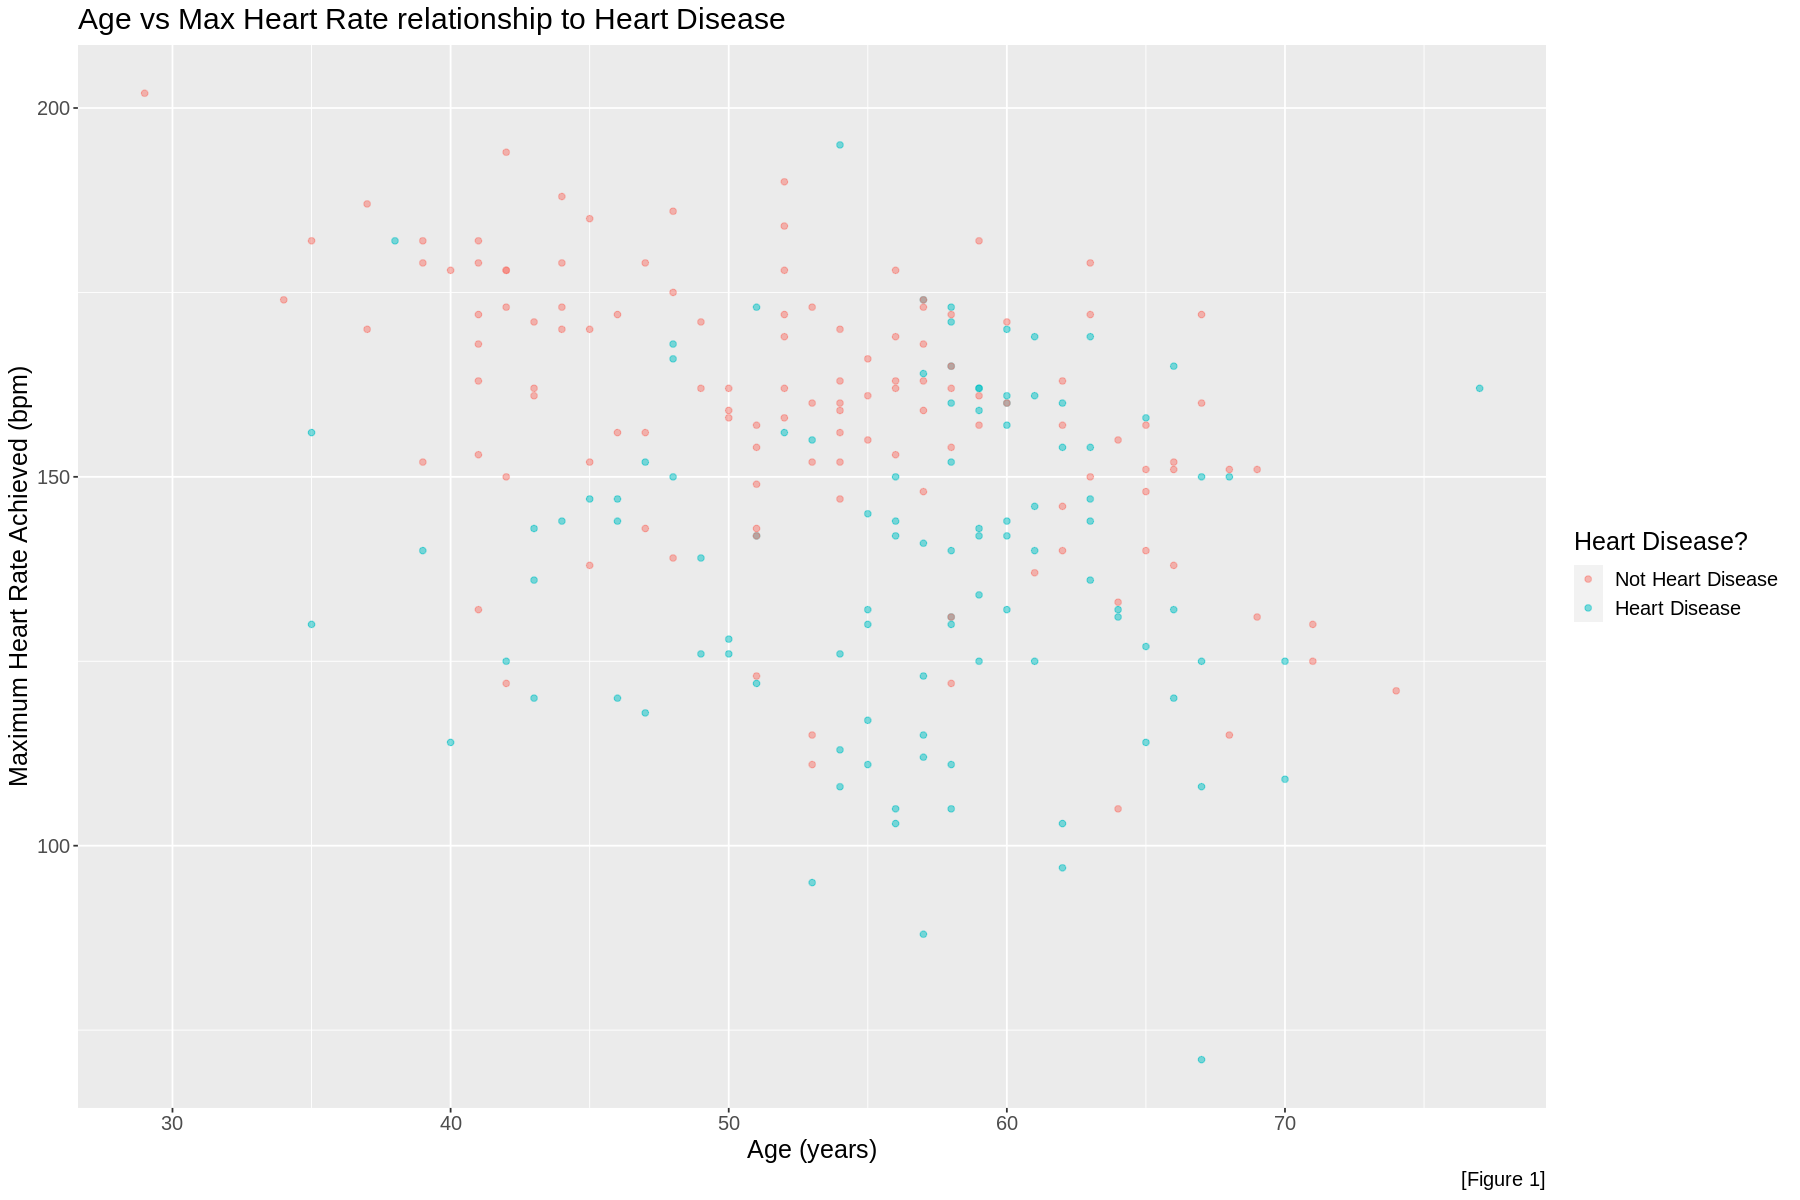

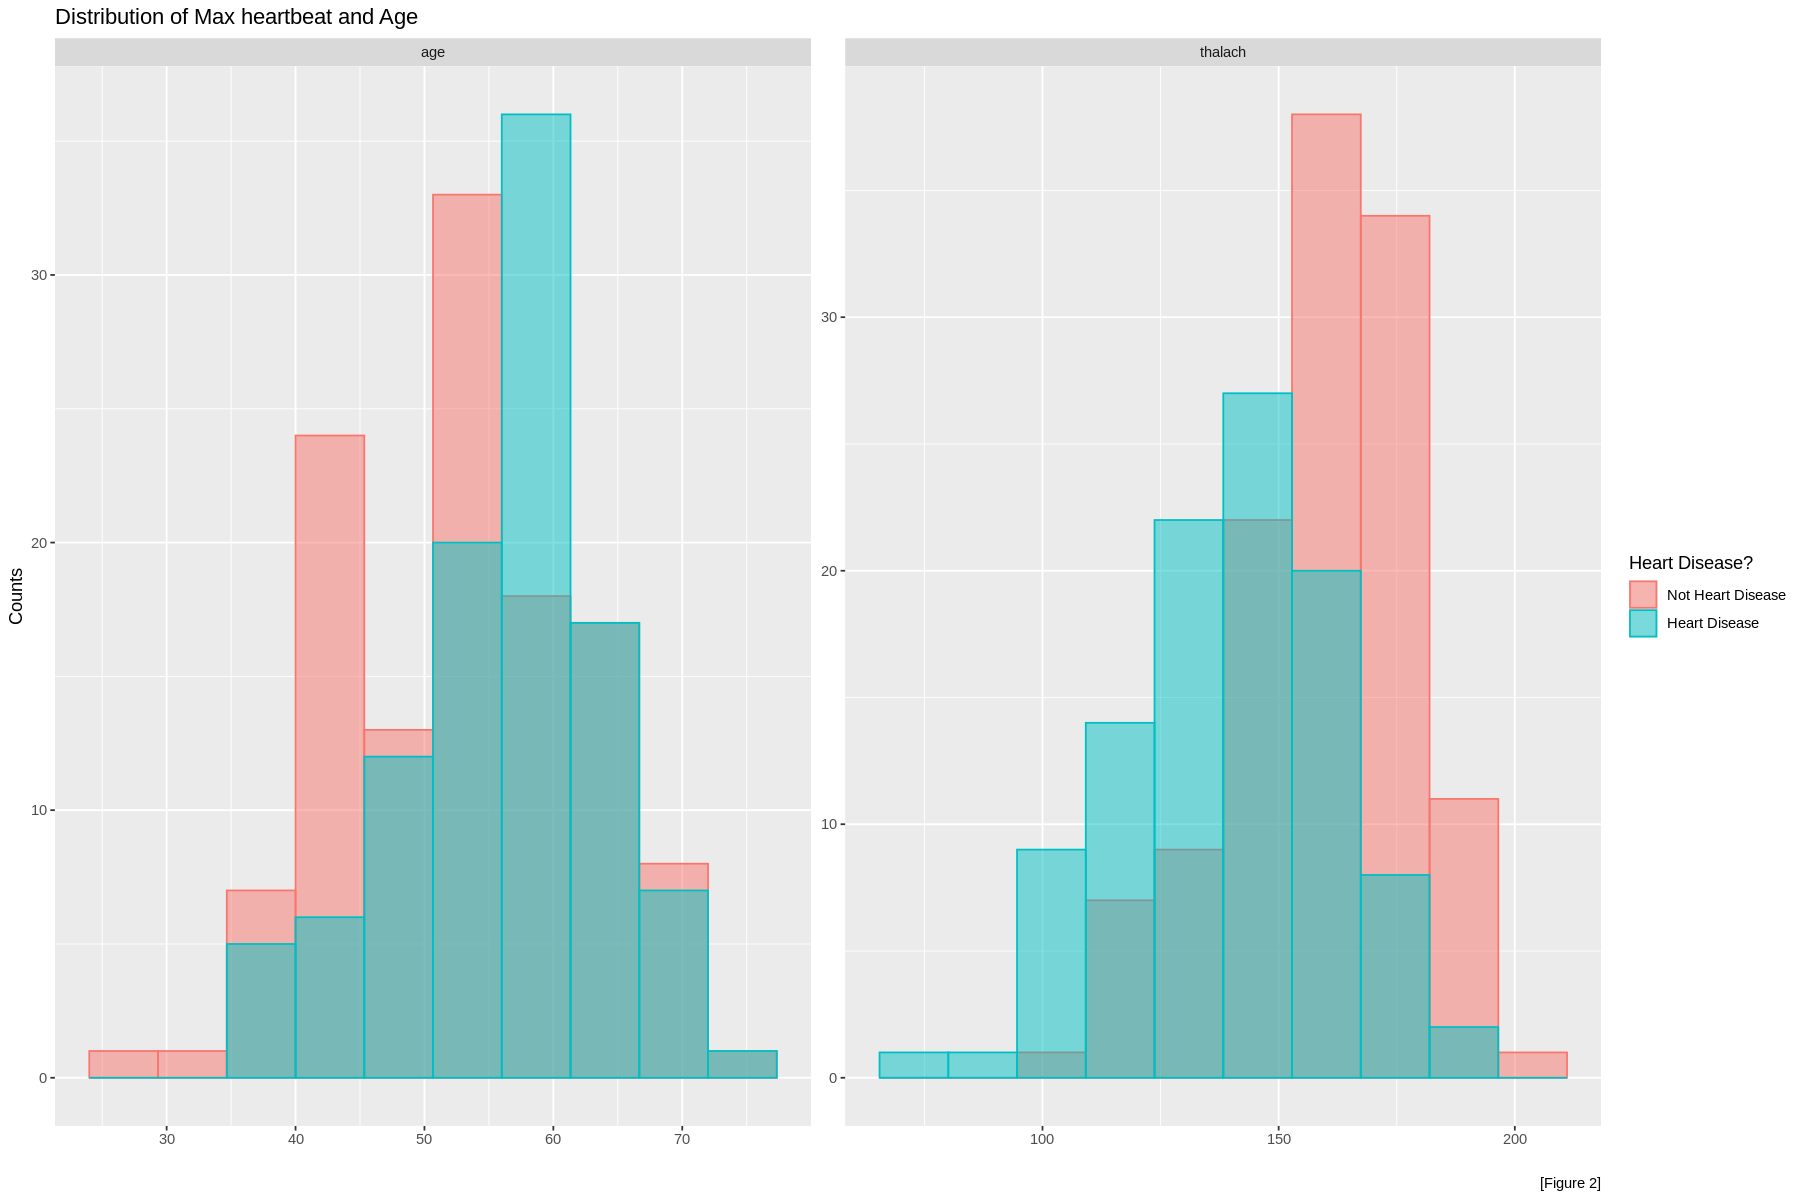

In [9]:
labels <- c(Age = "Age of Patients",
            Max = "Max Heartrate of Patients")

heart_data_viz <- heart_train |>
                  ggplot(aes(x = age, y = thalach, color = num)) + 
                  geom_point(alpha = 0.5) +
                  labs(x = "Age (years)", y = "Maximum Heart Rate Achieved (bpm)", color = "Heart Disease?",
                      caption = "[Figure 1]") + 
                  ggtitle("Age vs Max Heart Rate relationship to Heart Disease") +
                  theme(text = element_text(size=15)) 
heart_data_viz


hist_vector <- heart_train %>%
    select(age, thalach, num) %>% 
    pivot_longer(cols = age:thalach,
                 names_to = "predictor_var",
                 values_to = "info")

heart_data_histogram <- hist_vector |>
                  ggplot(aes(x = info, fill = num, color = num)) + 
                  geom_histogram(alpha = 0.5, position = 'identity', bins = 10) +  
                  labs(x = "", y = "Counts",
                       fill = "Heart Disease?",
                       colour = "Heart Disease?",
                       caption = "[Figure 2]") + 
                       ggtitle("Distribution of Max heartbeat and Age") +
                  facet_wrap(vars(predictor_var), 
                             scales = "free",
                             labeller = labeller(predictors = labels))
                   

                  
heart_data_histogram 

**Analysis of Visualizations:**

In summary, we can see from both plots that heart disease diagnosis increases when a patient has HIGH age and has decent to high maximum heart rate. Most points/bars indicated with heart disease have age of ~60 and average max heart rate of 140bpm whereas points indicating "not heart disease" have average age of ~45 and average max heart rate of also ~150bpm. Thus, there is an obvious evidence that as people age, there is more risk for heart disease but there seems to be no clear relationship with heart rate. However, points indicating heart disease still have very high heart rate level.

*Scatterplot:* 

- No direct relationship shown with heart disease indication vs age and max heart rate.
             
- However, the cases of heart disease diagnosis increases when age increases.
             
- Mostly, all the cases with heart disease have older age and higher max heart rate reached.
             
- One case with heart disease shows the highest heart rate reached, showing how higher heart rate could increase heart failure risk.
             
*Histogram:* 

- Age historgram shows how the age range is distributed from 40 to 70 mostly.
            
- It also highlights higher cases when the age is older and around 55 to 60.
            
- Heart rate histogram points to how the average heart rate for this data is 100~170.
            
- No direct relationship shown between heart rate and heart disease, however, cases of heart disease have decently high heart rate.


<h1> Data Analysis </h1>

<h3> Tuning and Cross-Validating </h3>

We will tune our classifier by creating validation set using multiple folds to enhance our accuracy, then generate K values that with accuracy statisitics and pick the most optimal. This is to enhance the accuacy of our overall classifier.

**Tuning steps:**
1. Set Seed to make the result reproducible
2. Used ```vfold_cv()``` to intialize a 10 fold cross validation. 10 is a reasonable amount as it isn't too big but also enhances accuracy.
3. Create a recipe with predictor class and variables and standardize the data.
4. Create a model with ```tune()``` as the neighbours to test multiple K values.
5. Create a workflow, fit the cross validated variable (which will run cross validation).
6. Pass in a tibble to test 1-20 K values 
7. Calculate accuracy with ```collect_metrics()``` which aggregates the accuracy mean and then filter for accuracy. 
8. Plot the K value with the accuracy of each value.

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5775527,10,0.02145026,Preprocessor1_Model01
2,accuracy,binary,0.5862648,10,0.02264444,Preprocessor1_Model02
3,accuracy,binary,0.6265975,10,0.02854572,Preprocessor1_Model03
4,accuracy,binary,0.6265975,10,0.02854572,Preprocessor1_Model04
5,accuracy,binary,0.6833992,10,0.02269044,Preprocessor1_Model05
6,accuracy,binary,0.6790514,10,0.02374719,Preprocessor1_Model06
7,accuracy,binary,0.7019598,10,0.02650764,Preprocessor1_Model07
8,accuracy,binary,0.7019598,10,0.02650764,Preprocessor1_Model08
9,accuracy,binary,0.6883235,10,0.02794016,Preprocessor1_Model09


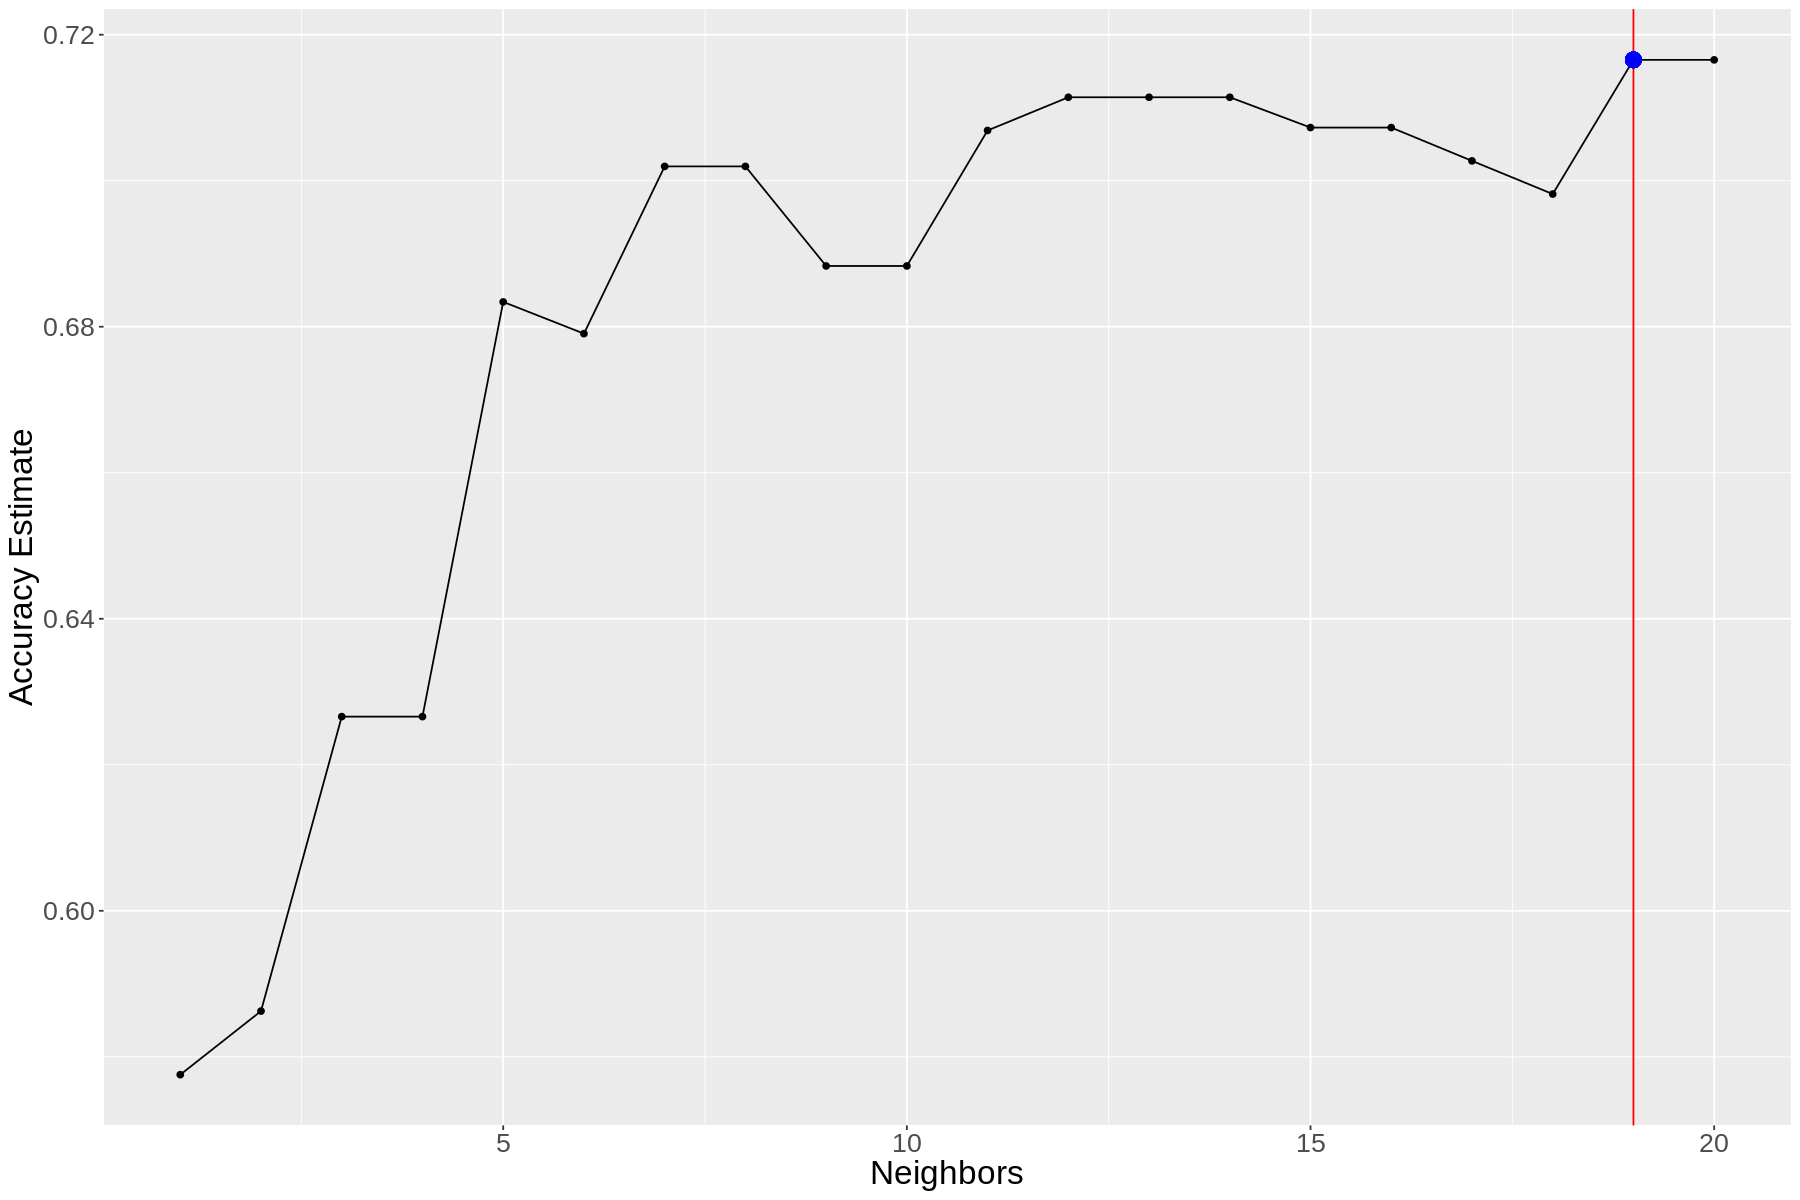

In [18]:
set.seed(2022)

heart_data_vfold <- vfold_cv(heart_train, v = 10, strata = num)

heart_recipe_final <- recipe(num ~ thalach + age, data = heart_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

gridvals <- tibble(neighbors = seq(1,20))
knn_results <- workflow() |>
  add_recipe(heart_recipe_final) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_data_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

knn_results

y_coord <- knn_results %>% filter(neighbors == 19) %>% select(mean) %>% pull()

cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 19, colour = "red") +
    geom_point(aes(x=19, y=y_coord), size = 4, colour = "blue") +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

cross_val_plot

According to the graph produced after cross-validation of 10 folds and testing 1~20 neighbours/K values, we can conclude that we get the highest accuracy at **k = 19** with 71%.

<h3> Predicting with KNN Classifier using best K </h3>

Using the optimal K value we derived using Cross-validation, we will create a new model with that many number of neighbours.

**Predicting Steps:**
1. Create the "best" specification model with 19 neighbours.
2. Fit the ```spec``` into the workflow
3. Use ```predict()``` on the TEST data and bind it to the testing data to create a prediction table.
4. Use ```metrics()``` to select the aggregated accuracy value and select the highest value to ensure our accuracy is high enough.

In [11]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19)|>
  set_engine("kknn") |>
  set_mode("classification")

heart_best_fit <- workflow() |>
  add_recipe(heart_recipe_final) |>
  add_model(knn_best_spec) |>
  fit(data = heart_train)
  
heart_predictions <- predict(heart_best_fit, heart_test) |> 
    bind_cols(heart_test)

heart_predictions

heart_acc <- heart_predictions |> 
    metrics(truth = num, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

heart_acc

.pred_class,age,sex,cp,rbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
Not Heart Disease,64,1,3,140,335,0,0,158,0,0.0,1,0.0,3.0,Heart Disease
Heart Disease,57,1,4,110,335,0,0,143,1,3.0,2,1.0,7.0,Heart Disease
Heart Disease,63,1,4,130,330,1,2,132,1,1.8,1,3.0,7.0,Heart Disease
Heart Disease,59,1,4,170,326,0,2,140,1,3.4,3,0.0,7.0,Heart Disease
Not Heart Disease,64,0,4,180,325,0,0,154,1,0.0,1,0.0,3.0,Not Heart Disease
Heart Disease,64,0,4,130,303,0,0,122,0,2.0,2,2.0,3.0,Not Heart Disease
Not Heart Disease,43,1,4,115,303,0,0,181,0,1.2,2,0.0,3.0,Not Heart Disease
Not Heart Disease,71,0,2,160,302,0,0,162,0,0.4,1,2.0,3.0,Not Heart Disease
Not Heart Disease,42,1,2,120,295,0,0,162,0,0.0,1,0.0,3.0,Not Heart Disease


.metric,.estimate
<chr>,<dbl>
accuracy,0.7105263


**Result:**
With the best K value, we were able to achieve the most costly value and highest possible accuracy of 71%.

<h3> Visualizing our Prediction </h3>

We are using ```conf_mat()``` to numerically and conveniently visualize how our classifier performed. The matrix will highlight how many predictions were correct and incorrect.

In [12]:
heart_prediction_viz <- heart_predictions |>
  conf_mat(truth = num, estimate = .pred_class)


heart_prediction_viz

                   Truth
Prediction          Not Heart Disease Heart Disease
  Not Heart Disease                32            13
  Heart Disease                     9            22

**From the visualization above, we can conclude that:**
1. 71%, therefore, majority of the predictions were guessed correctly.
2. Only 9 cases were incorrectly mis-predicted with 32 being correct.
3. Way more heart disease cases were predicted correct, 9 more (22 out of 35). This shows that our model is  "accurate" enough as it was able to dominantly pick out the heart disease cases, which was the entire purpose of our classifier.

<h2> Discussion </h2>

<h4> Summary </h4>

With our KNN classification, we were able to discover that ```thalach``` (max heart rate) and ```age``` (Age of patients) were the most effective predictors out of the 4 to predict the risk of heart disease diagnosis by using "Forward Selection".

We did not decide to use a single variable as that will overfit the data and by using 2 predictors we ended up with an accuracy of 73%.

<h4>What we discovered and expected</h4>

From this project and additional research, we were able to clearly understand how the increase of age decreases the overall organ performance, which directly weakens the blood delivery of the heart. Further, we found that the increase of maximum heart rate is correlated to the health of blood vessels which influences the risk of heart disease.
While our group did not expect these 2 choices as predictors, after thorough research, these reasons essentially created a good combination for prediction. However, we expected a higher accuracy value as scientifically, they were the main reasons that led to heart disease. 

With the summarizing and wrangling processes, our group was able to create a pre-analysis prediction. The 3rd summary table showed that heart disease cases were more abundant in patients with higher age. Also, with the 2nd table showing how maximum heart rate was way beyond the normal level, it can be concluded that heart disease is simply more common with higher ```thalach```. These are results that we expected and got from our data analysis since abnormal blood delivery indicates fat buildups which directly results in heart disease.

Through cross-validation, our group was able to obtain the highest possible accuracy using 10 folds. While 10 folds slowed down our program compared to 5 folds, it did give us better overall prediction results. We also discovered that increasing the props from 0.7 to 0.75. This is because there would be more information in our training data to train the model.

<h4>What our prediction accuracy means</h4>

With our prediction, our group discovered that our classifier detected MORE correct heart disease cases than incorrect ones. This is what we expected to find as our accuracy was high enough. This points to the fact that even though our numerical accuracy level isn't the highest, our classifier happens to be decently "accurate". This is because, it was successful in detecting most heart disease indication which is important in life and death situations. On the other hand, it wouldn't have been accurate if our classifier incorrectly predicted cases indicating heart disease.

<h4>What impact our findings could have</h4>

Through our classifier and our discoveries, our group hope to strengthen the capabilities of the medical field by integrating a classfication model that will accurately detect heart disease for patients to become treated as soon as possible and be warned to not indulge in any activities that worsens their heart condition. 
We also wish to support the medical research field with this project so that more predictors that increase heart disease risk can be discovered.

<h4>Future questions our project could lead to are:</h4>

1. Does the increase in exercise level directly decreases heart disease diagnosis?
2. If our classifier was given datasets from another hospital or younger group of people, would the accuracy be the same?
3. Even though the predictors our group chose was both scientifically and programmatically the best predictors, the accuracy was only 71%. Can we increase this accuracy if we took more data samples (samples that will NOT cause imbalance)?

<h2> References </h2>

- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. (1988) UCI Machine Learning Respository: Heart Disease Data Set. Medical Information regarding heart disease for patients in Cleveland hospitals. https://archive.ics.uci.edu/ml/datasets/Heart+Disease



-  J Healthc Eng: Nagavelli U, Samanta D, Chakraborty P. (2022) Machine Learning Technology-Based Heart Disease Detection Models.
Research article discussing the process of predicting heart disease using different models. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8898839/

- Center for Disease Control and Prevention: National Center for Chronic Disease Prevention and Health Promotion (2022). Heart Disease and Stroke. Article discussing the cause and effect of heart disease. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity.

- Journal of the American Heart Association: Peter W. F. Wilson, Ralph B. D’Agostino, Daniel Levy, Albert M. Belanger, Halit Silbershatz and William B. Kannel (1998). Prediction of Coronary Heart Disease Using Risk Factor Categories. Research article on how to calculate the risk of heart disease using age and blood substance. https://www.ahajournals.org/doi/10.1161/01.CIR.97.18.1837